In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits

from matplotlib import style
style.use("seaborn")
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [2]:
rootdir = Path.home() / "MMT/wfsdat"
# use find to make this csv list
with open(rootdir / "2022_q3.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [3]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,5665,1,binospec,5665
f5,34,1,f5,34
mmirs,1634,1,mmirs,1634


In [4]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [5]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2022-07-06T03:42:55.499000,binospec,wfs_ff_cal_img_2022.0706.034255.fits,10.0,1.2366,17.387795,53.965025,16,15.2,14.831,...,-0.02,-2.695,-11.299,258.007831,251.010414,1.401977,1.592496,7.532247,723.878028,1573.196359
1,2022-07-06T03:44:00.819000,binospec,wfs_ff_cal_img_2022.0706.034400.fits,20.0,1.2355,17.211574,54.038303,16,15.2,14.821,...,-17.22,-0.000,-1.862,256.011427,248.004647,1.304154,1.480589,7.108653,839.170024,1451.429497
2,2022-07-06T03:45:01.306000,binospec,wfs_ff_cal_img_2022.0706.034501.fits,20.0,1.2345,17.064063,54.099157,15,15.2,15.091,...,11.60,-0.000,1.619,256.010610,252.980894,1.443829,1.638364,7.704744,519.432207,1441.793973
3,2022-07-06T03:46:03.657000,binospec,wfs_ff_cal_img_2022.0706.034603.fits,30.0,1.2336,16.915522,54.159313,16,15.2,14.961,...,-1.69,0.592,-0.038,256.004691,250.995579,1.526300,1.731189,8.051910,324.552316,1491.018221
4,2022-07-06T03:46:37.176000,binospec,wfs_ff_cal_img_2022.0706.034637.fits,30.0,1.2330,16.826087,54.195201,16,15.2,14.892,...,9.89,0.000,1.152,255.988262,251.986579,1.357146,1.538879,7.329786,463.666432,1425.106098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2022-09-28T11:55:08.453000,binospec,wfs_ff_cal_img_2022.0928.115508.fits,40.0,1.6174,226.594085,38.189677,12,11.7,12.493,...,-0.00,-0.408,-0.000,287.994929,244.006782,0.957435,1.277615,6.329928,202.345464,1185.055696
611,2022-09-28T11:55:51.605000,binospec,wfs_ff_cal_img_2022.0928.115551.fits,40.0,1.6213,226.764952,38.083183,12,11.7,12.721,...,-3.86,-0.000,0.000,286.506674,252.500014,0.959036,1.281602,6.345359,197.904214,1220.566972
612,2022-09-28T11:56:34.765000,binospec,wfs_ff_cal_img_2022.0928.115634.fits,40.0,1.6257,226.959402,37.961067,12,11.7,12.623,...,0.00,-0.091,0.129,286.501885,252.505239,0.971082,1.299811,6.415766,213.341167,1255.846580
613,2022-09-28T11:57:17.908000,binospec,wfs_ff_cal_img_2022.0928.115717.fits,40.0,1.6296,227.129068,37.853768,12,11.7,12.554,...,-0.75,-0.000,-0.000,287.500796,253.757603,0.958747,1.285146,6.359072,157.162380,1245.326344


In [6]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 800x500 with 0 Axes>

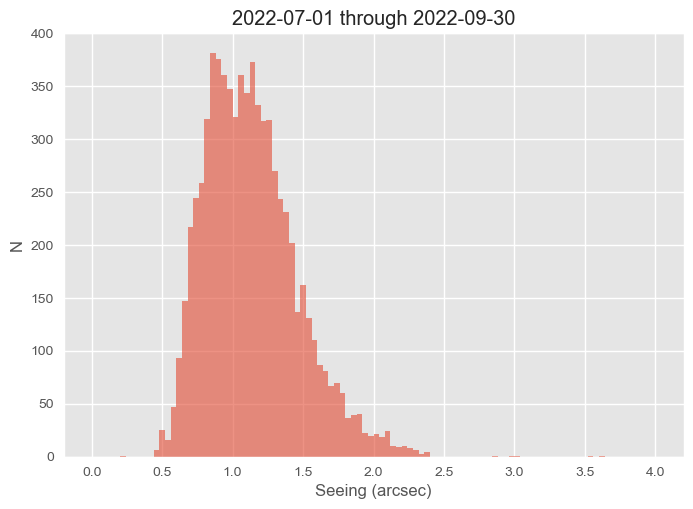

In [7]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2022-07-01 through 2022-09-30")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [8]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.2888805902340188 0.017878404648035084 1.0706719286068838


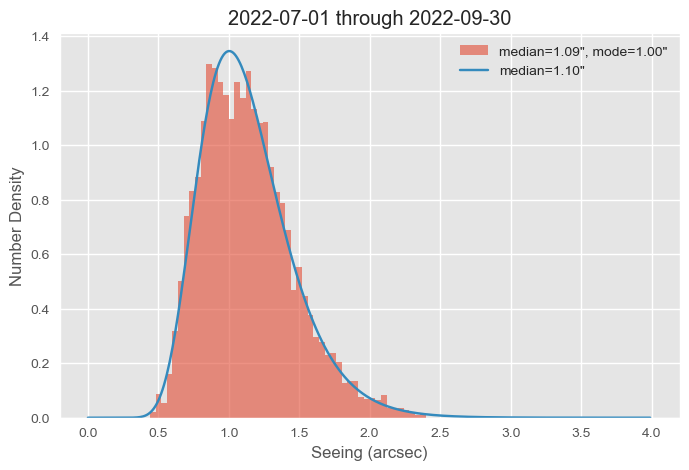

In [9]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2022-07-01 through 2022-09-30")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2022q3_hist.png")
plt.show()

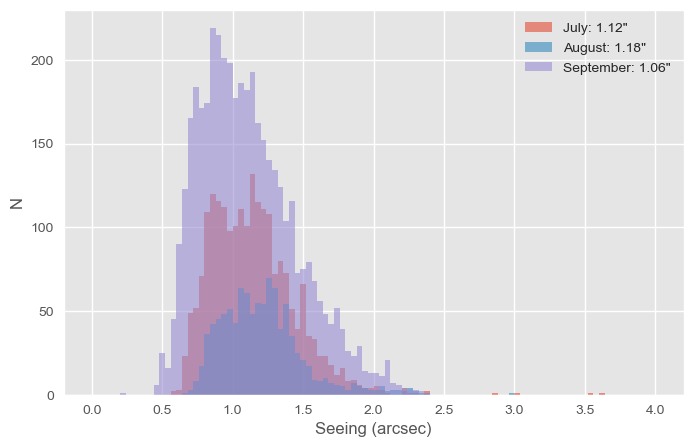

In [10]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['July'] = fixed.loc['2022-07']
months['August'] = fixed.loc['2022-08']
months['September'] = fixed.loc['2022-09']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2022q3_monthly.png")
plt.show()

In [11]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

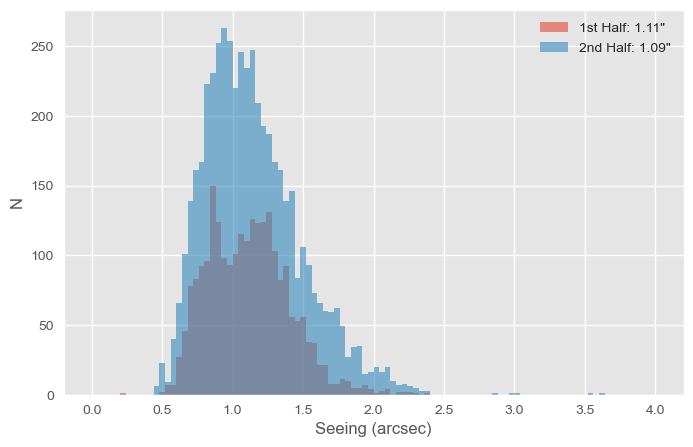

In [12]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2022q3_1st2nd.png")
plt.show()

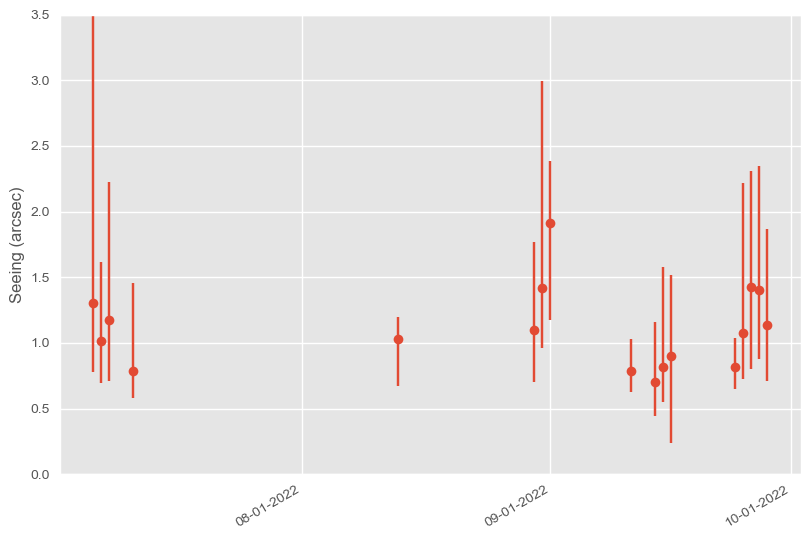

In [13]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2022q3_nightly.png")
plt.show()

In [14]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

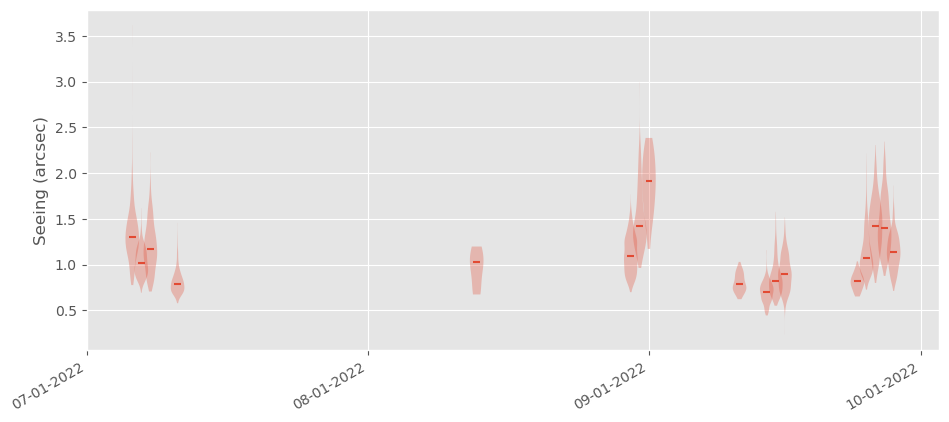

In [15]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022q3_violin.png")
    plt.show()

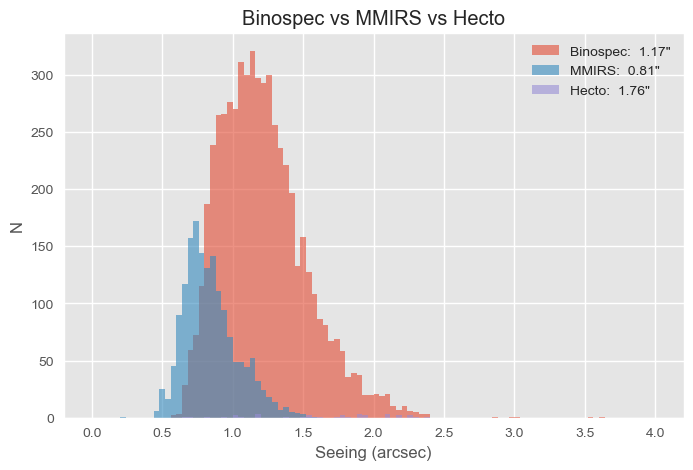

In [16]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'mmirs'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'mmirs'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"MMIRS: {medm: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.legend()
    plt.title("Binospec vs MMIRS vs Hecto")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.savefig("bino_vs_mmirs_2022q3.png")
plt.show()

In [18]:
mmirs = fixed[fixed['wfs'] == 'mmirs']